Libraries

In [1]:
import random
import math
from matplotlib import pyplot as plt
import numpy as np

Problem Inputs

In [ ]:
n_polynomial = int(input('Input the degree of the polynomial: '));
range_coe_l = int(input('Input the lower range of the polynomial coefficients: '));
range_coe_u = int(input('Input the upper range of the polynomial coefficients: '));
points_x = [];
points_x = list(map(int,input("Input the x components of the points on the polynomial(Comma-separated values with same order): ").strip().split(',')));
points_y = [];
points_y = list(map(int,input("Input the y components of the points on the polynomial(Comma-separated values with same order): ").strip().split(',')));

Input the degree of the polynomial: 3
Input the lower range of the polynomial coefficients: -6
Input the upper range of the polynomial coefficients: 5
Input the x components of the points on the polynomial(Comma-separated values with same order): 0, 1, 2, -1
Input the y components of the points on the polynomial(Comma-separated values with same order): 1, 0, -5, -8


Rearranging Inputs

In [ ]:
inputs = [[0 for i in range(2)] for j in range(len(points_x))];
for k in range(0 , len(points_x)):
  inputs[k][0] = points_x[k];
  inputs[k][1] = points_y[k];
n_poly = n_polynomial;
r = list(range(range_coe_l, range_coe_u+1, 1));

Give inputs by editing below variables
(By using this cell there is no need to run two previous cells)

In [25]:
inputs=[
[0, 1],
[1, 0],
[2, -5],
[-1, -8]];
n_poly = 3;
r = list(range(-6, 6, 1));

Define Parameters

In [16]:
n_chrom = 1000;
m_r = 0.3;
p_survive = 0.04;
s_r = 0.5;
b = 100;

Generate Population

In [4]:
def population_generation(n_ch,n_p,r):
  population = [[0 for i in range(n_poly+1)] for j in range(n_chrom)];
  for i in range(0, n_ch):
    for j in range(0, n_p+1):
      population[i][j] = random.randint(min(r),max(r));
  return population

In [5]:
def y_polynomial(n,x,p):
  y = p[0];
  for i in range(1, n+1):
    y = y*x + p[i];
  return y

Evaluate Fitness

In [6]:
def fitness_MSE(n_c,n_p,input,pop):
  MSE = [[0 for i in range(2)] for j in range(n_c)];
  for i in range(0, n_c):
    for j in range(0, len(input)):
      MSE[i][0] = MSE[i][0] + ((input[j][1] - y_polynomial(n_p,input[j][0],pop[i]))**2)/len(input);
  for k in range(0,n_c):
    MSE[k][1] = k;
  return MSE

Single Crossover

In [7]:
def single_crossover(list_1, list_2, cop):
  l_1 = [];
  l_2 = [];
  l_1[:cop] = list_1[:cop];
  l_1[cop:] = list_2[cop:];
  l_2[:cop] = list_2[:cop];
  l_2[cop:] = list_1[cop:];
  return [l_1 , l_2]

Crossover Operation

In [8]:
def crossover_operation(n_c,pop,MSE_f,s_r,b):
  l = [];
  pop_sort = [];
  selection_rate = s_r;
  max_selection = math.floor(selection_rate*n_c);
  children = [0]*max_selection;
  for i in range(0,n_c):
    l.append(MSE_fitness[i][0])
  for j in range(0,n_c):
    pop_sort.append(population[(MSE_fitness[j][1])])
  arr = np.array(l)
  gain = list(1/(arr+b));
  for k in range(0, max_selection):
    randomchoice_1 = random.choices(pop_sort, weights=gain);
    randomchoice_2 = random.choices(pop_sort, weights=gain);
    children[k] = single_crossover(randomchoice_1[0], randomchoice_2[0], random.randint(1,n_poly));
  return children

In [9]:
def oneDlist(child, n_c, r):
  child_list = [];
  for i in range(0,int(n_c*r)):
    for j in range(0,2):
      child_list.append(child[i][j]);
  return child_list

Mutation Operation

In [10]:
def mutation_operation(n_c,pop,n_p,r,m_u):
  mutation_rate = m_u;
  max_mutation = math.floor(mutation_rate*n_c);
  rand = [];
  for i in range(0, max_mutation):
    rand.append(random.randint(0, n_c-1))
  for j in range(0, len(rand)):
    for k in range(0, n_p+1):
      pop[rand[j]][k] = random.randint(min(r),max(r));
  return pop

Generate Initial Population

In [27]:
population = population_generation(n_chrom,n_poly,r);
MSE_fitness = fitness_MSE(n_chrom,n_poly,inputs,population);

The Genetic Algorithm

In [28]:
fit_error = [];
pop_sort = [];
max_survive_number = math.floor(p_survive*n_chrom);
MSE_fitness.sort();
for i in range(0,1000):
  c1 = crossover_operation(n_chrom, population, MSE_fitness, s_r, b);
  child_l1 = oneDlist(c1, n_chrom, s_r);
  MSE_fitness = fitness_MSE(n_chrom, n_poly, inputs, population);
  MSE_fitness_children = fitness_MSE(n_chrom, n_poly, inputs, child_l1);
  MSE_fitness.sort();
  MSE_fitness_children.sort();
  for j in range(0,n_chrom):
    pop_sort.append(population[(MSE_fitness[j][1])])
  for k in range(0, len(pop_sort)-max_survive_number):
    pop_sort[k + max_survive_number] = child_l1[MSE_fitness_children[k][1]];
  np.random.shuffle(pop_sort);
  population = pop_sort.copy();
  pop_sort.clear();
  population = mutation_operation(n_chrom, population, n_poly, r, m_r);
  MSE_fitness = fitness_MSE(n_chrom, n_poly, inputs, population);
  MSE_fitness.sort();
  fit_error.append(MSE_fitness[0][0]);
  if fit_error[i] == 0:
    break;
print('The coefficients of the best polynomial estimation from x^n to x^0 is:',population[MSE_fitness[0][1]]);

The coefficients of the best polynomial estimation from x^n to x^0 is: [1, -5, 3, 1]


Plot Best Estimation

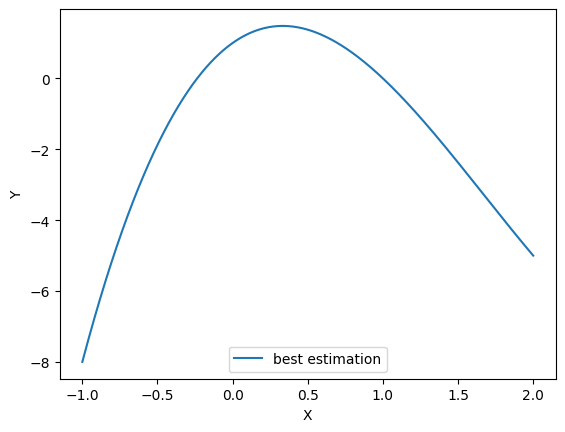

In [29]:
x = np.linspace(-1,2,1000);
p = population[MSE_fitness[0][1]];
y = [np.polyval(p, i) for i in x];
plt.plot(x, y, label = 'best estimation');
#use blew commented code for comparison if you know the exact solution
#p_real = [1, -5, 3, 1];
#y_real = [np.polyval(p_real, i) for i in x];
#plt.plot(x, y_real , label = 'exact solution');
leg = plt.legend(loc='lower center');
plt.xlabel('X');
plt.ylabel('Y');